<a href="https://colab.research.google.com/github/Gauranga2022/Machine-Learning-Projects/blob/Diabetes_prediction_using_SVM/Diabetic_prediction_using_support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #used to standardise the data into a common range
from sklearn.model_selection import train_test_split #splitting into training and test data
from sklearn import svm #support vector machines
from sklearn.metrics import accuracy_score
import seaborn as sns

Data Collection and Analysis

PIMA Diabetes Dataset



In [4]:
#loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/diabetes.csv')

# pd.read_csv to see/understand what a particular function does.


In [5]:
#printing the first 5 rows of a dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

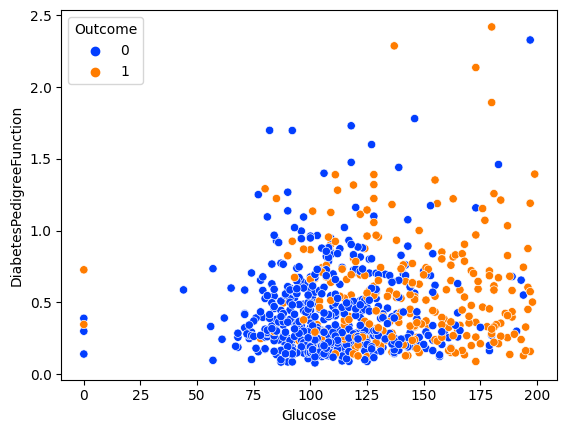

In [14]:
sns.scatterplot(x="Glucose",y="DiabetesPedigreeFunction", data = diabetes_dataset, hue="Outcome", palette = "bright")

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

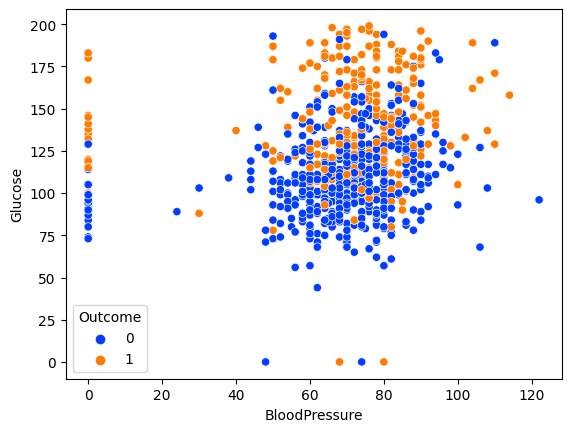

In [16]:
sns.scatterplot(y="Glucose",x="BloodPressure", data = diabetes_dataset, hue="Outcome", palette = "bright")

In [18]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: xlabel='Glucose', ylabel='Count'>

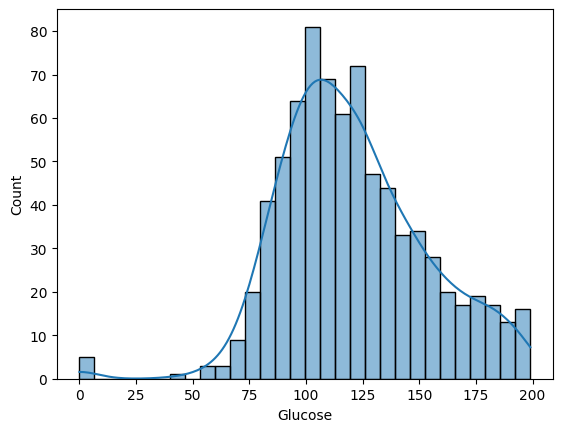

In [33]:
sns.histplot(diabetes_dataset["Glucose"],kde=True, bins=30)

<Axes: xlabel='Outcome', ylabel='Age'>

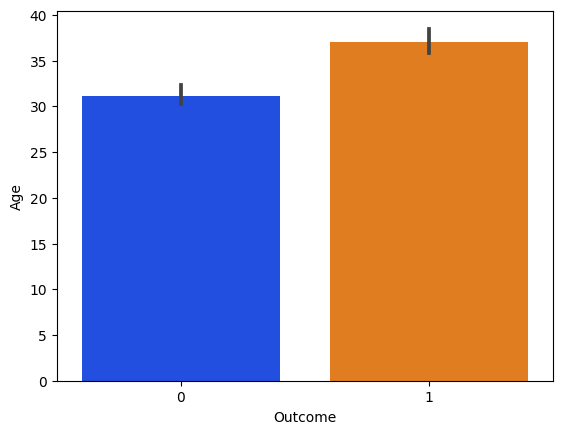

In [30]:
#sns.barplot(x="Outcome",y="Glucose",data=diabetes_dataset,palette="bright")
#sns.barplot(x="Outcome",y="BMI",data=diabetes_dataset,palette="bright")
#sns.barplot(x="Outcome",y="BloodPressure",data=diabetes_dataset,palette="bright")
#sns.barplot(x="Outcome",y="DiabetesPedigreeFunction",data=diabetes_dataset,palette="bright")
#sns.barplot(x="Outcome",y="Insulin",data=diabetes_dataset,palette="bright")
sns.barplot(x="Outcome",y="Age",data=diabetes_dataset,palette="bright")


<Axes: >

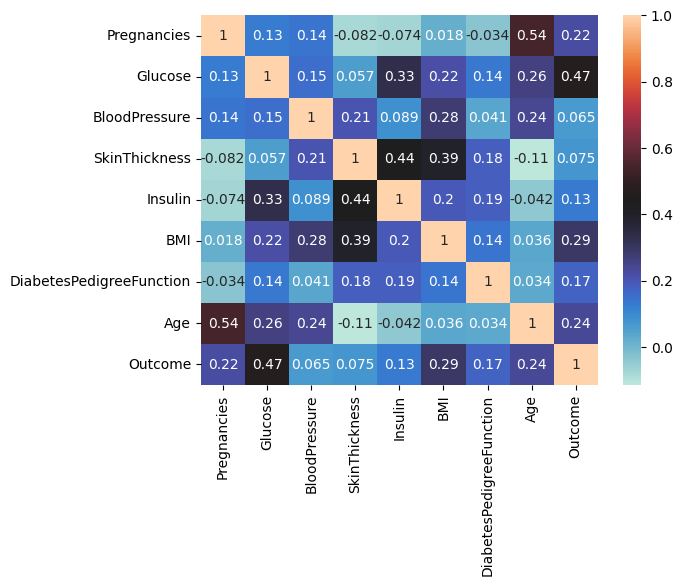

In [31]:
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap="icefire")

In [ ]:
#number of rows and columns in this dataset
diabetes_dataset.shape #(no. of columns, no. of rows) in the entire dataset

(768, 9)

In [ ]:
#getting the statistical measures of the data like mean, sd, etc
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()
#So basically what happens it takes this outcome value and checks how many examples are there for the two labels 1 (diabetic) and 0(non diabetic)

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
diabetes_dataset['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
#now we can get the mean for all those values for label 0 and label 1
diabetes_dataset.groupby('Outcome').mean()
#observe that the mean value of glucose for the diabetic people is 141 which is natural and 110 for non diabetic people 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
diabetes_dataset.groupby('Pregnancies').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,123.000000,67.153153,22.270270,81.675676,34.290090,0.520838,27.603604,0.342342
1,112.748148,67.792593,24.437037,98.674074,31.372593,0.486496,27.370370,0.214815
2,110.796117,63.252427,21.601942,85.844660,30.583495,0.491660,27.194175,0.184466
3,123.586667,66.586667,20.080000,87.453333,30.425333,0.432147,29.026667,0.360000
4,125.117647,70.029412,15.882353,69.441176,32.141176,0.446353,32.779412,0.338235
5,118.859649,76.210526,17.385965,57.298246,33.192982,0.396421,39.035088,0.368421
6,120.800000,68.420000,17.640000,63.580000,30.290000,0.429520,39.340000,0.320000
7,136.444444,70.777778,20.288889,84.466667,32.631111,0.443622,41.111111,0.555556
8,131.736842,75.184211,17.315789,92.815789,31.568421,0.504711,45.368421,0.578947


In [ ]:
#separating data and labels
X= diabetes_dataset.drop(columns='Outcome', axis=1)
#So I am trying to drop a particular column (so we need to mention axis=1, axis=0 for row) from the diabetes dataset
Y= diabetes_dataset['Outcome'] #square brackets

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data Standardization



why are we doing this?

So we have no. of pregnancies here, blood pressure, glucose value, etc, so the range of pregnancies is 1 to 17, glucose level is around 200 at max, bmi is in the 25-30 range, ok? If there is a difference in the range of all these values, it will be difficult for our ML model to make some prediction. So in most cases what we will do is we will try to standardize the data in a particular range and that helps our ML model to make better predictions. So we are going to use this StandardScaler function which was imported above


In [ ]:
scaler = StandardScaler()


In [ ]:
standardized_data = scaler.fit_transform(X) 
#so this scaler variable has this StandardScaler function: scaler.fit
#as you can see all these values of X have been fitted and transformed into numbers (similar range) in +-0.,, or +-1.,,

In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)
# So basically X represents the data and Y represents the model
# we have all the data in X and all the labels in Y

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train_Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=2)
#We have already imported the train_test_split function from the module sklearn.model_selection


The entire dataset has been given as X and the entire labels has been given as Y. From this the X_train, X_test will be splitted and Y_train,Y_test will be the X's respective labels. Test_size=0.2 represents 20% of data will be used as test data. Stratify=Y means that the labels that are in Y are wanted to be splitted in the same proportion as in X_test and X_train. Otherwise it is possile that all the diabetic people might get into X_test or otherwise. 

random_state: Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. Because of the nature of splitting the data in train and test is randomised you would get different data assigned to the train and test data unless you can control for the random factor.

For example, imagine you have numbers: 1,2,3,4,5 and you want to select two random numbers. Without using a random_state you would get different things: i.e. first 2,5 then 3,4 and so on.
When you control the random generator by setting the random state to 0, 1 or another number, everyone would get the same random numbers generated: i.e random_state=1 then the random numbers are 1,3 and everyone who will pick two random numbers using random_state=1 from 1,2,3,4,5 will get the same two numbers as you: 1,3.

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (691, 8) (77, 8)


### Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')
#We create a variable called classifier and from the imported svm, we use the svm.SVC(Support Vector Classifier) and we represent another parameter called kernel and set it to linear because we are going to use a linear model

In [ ]:
#Now we will fit our training data to this classifier, i.e training the SVM classifier
classifier.fit(X_train, Y_train)
#Now this trained our ML model and now we can evaluate our model

SVC(kernel='linear')

### Model Evaluation (Checking how many times is our model predicting correctly) 

### Accuracy Score 
So lets try to find the accuracy score on training data. So we will try to predict all these training data and so we wont give the ML model these labels. We will try to predict all these labels for the training data and we will compare the prediction of our model to the original labels which is Y_train and try to predict the accuracy score.

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 
#1 We are going to predict all the labels for X_train. All those predictions made by the model are stored in this variable X_train_prediction
#2 Now we are comparing the prediction of our model which is stored in this X_train_prediction with the original labels stored in Y_train


In [ ]:
#printing the accuracy score on the training data
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.784370477568741


In [ ]:
#Completely similarly; we try for the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 
print('Accuracy score of the training data:',test_data_accuracy)

Accuracy score of the training data: 0.7792207792207793


Accuracy score of more than 75% is considered good. This is a small data that is why accuracy score could be low. however it shows a good accuracy score. Because the accuracy score is good, you can use other optimization techniques to find better.
The accuracy score for test data is in general lesser than that of the training data because of its size. Now we see that the accuracy score is 78 which is again a good score, given its a very small amount of data. Both the accuracy scores ascertains that the model has not overtrained (meaning that the model just trains a lot on the training data that it cannot perform well on the test data). in such case the train data accuracy will be very high and the test data accuracy will be very low; overfitting.

### Making a predictive system

In [ ]:
#1 now we need to build a predictive system given a all these data in the form of test data.
#2 change the input into a numpy array, because it is easy to deal with
#3 now we need to reshape this data as we are predicting for one instance. This is because our model expects 768 datapoints but we are just giving one, so this will make a confusion to the model and hence we need to reshape the array and this reshaping will tell that we need just one data point
#4 now we need to standardize the input data like we previously did
#5 now we make the prediction by using the svm model that we have trained and stored in the variable classifier, [43]

input_data = (0,	100,	90,	1,	0,	33.6,	0,	32.3) #we know that the person is non diabetic hence, labelled '0'
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #(1,-1) represents one data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0]==0): #prediction is a list, so prediction[0] 
  print('The person is non diabetic')
else:
  print('The person is diabetic')




[[-1.14185152 -0.65393918  1.08020025 -1.22548415 -0.69289057  0.20401277
  -1.42512243 -0.08005783]]
[0]
The person is non diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
